In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
from scipy import stats
import warnings

In [4]:
warnings.filterwarnings('ignore')

# Set plot style
sns.set_theme(style="whitegrid")
print("--- Homework 3 Analysis in Python ---")

# --- Question 1 ---
print("\n--- Question 1 ---")

q1 = pd.read_csv("HW3 Question 1 Data S2025.csv", sep = ",")
# R's column names with dots are kept, use quotes in formulas
q1.columns = ['antioxidant', 'chocolate']

print(q1.head())

--- Homework 3 Analysis in Python ---

--- Question 1 ---
   antioxidant chocolate
0        118.8        dc
1        122.6        dc
2        115.6        dc
3        113.6        dc
4        119.5        dc



## 1a: ANOVA Test


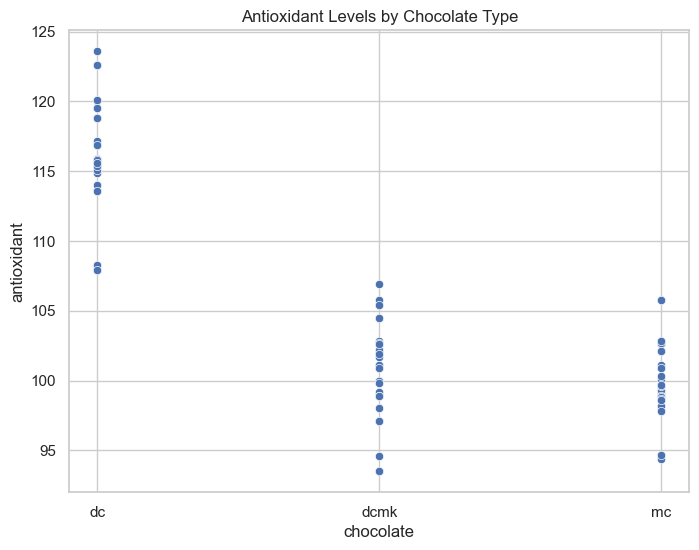

                sum_sq     df          F        PR(>F)
chocolate  7794.357639    2.0  391.14503  2.908086e-58
Residual   1404.855417  141.0        NaN           NaN

The F-statistic is very large and the p-value is close to zero, so we reject the null hypothesis.

## 1b: Group Means Comparison
Effects (Group Mean - Grand Mean):
chocolate
dc      10.399306
dcmk    -4.913194
mc      -5.486111
Name: antioxidant, dtype: float64

## 1c: Pairwise T-tests with Bonferroni Correction
Using Bonferroni correction. New confidence level: 0.9833

Comparing dcmk and dc:
  T-statistic: -22.5793, P-value: 0.0000

Comparing dcmk and mc:
  T-statistic: 0.9412, P-value: 0.3490

Comparing dc and mc:
  T-statistic: 24.6597, P-value: 0.0000

## 1d: Tukey's HSD Test
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    dc   dcmk -15.3125   0.0 -16.8387 -13.7863   True
    dc     mc -15.8854   0.0 -1

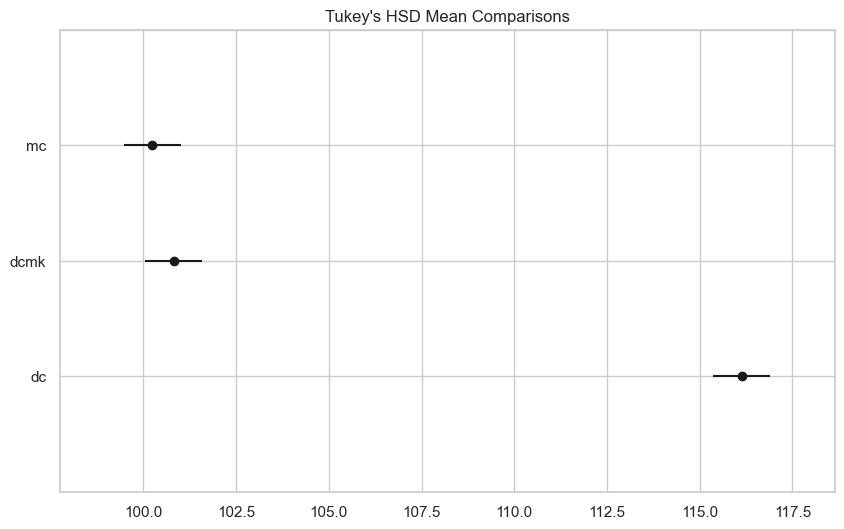


All group differences are significant (reject=True).


In [5]:
# --- a ---
print("\n## 1a: ANOVA Test")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chocolate', y='antioxidant', data=q1)
plt.title('Antioxidant Levels by Chocolate Type')
plt.show()

q1m1 = ols('antioxidant ~ chocolate', data=q1).fit()
anova_table = sm.stats.anova_lm(q1m1, typ=2)
print(anova_table)
print("\nThe F-statistic is very large and the p-value is close to zero, so we reject the null hypothesis.")

    # --- b ---
print("\n## 1b: Group Means Comparison")
grand_mean = q1['antioxidant'].mean()
group_means = q1.groupby('chocolate')['antioxidant'].mean()
effects = group_means - grand_mean
print("Effects (Group Mean - Grand Mean):")
print(effects)

# --- c ---
print("\n## 1c: Pairwise T-tests with Bonferroni Correction")
choc_types = q1['chocolate'].unique()
comparisons = [
('dcmk', 'dc'),
('dcmk', 'mc'),
('dc', 'mc')
]
    
alpha = 0.05
corrected_alpha = alpha / len(comparisons)
print(f"Using Bonferroni correction. New confidence level: {1-corrected_alpha:.4f}")

for type1, type2 in comparisons:
    group1 = q1[q1['chocolate'] == type1]['antioxidant']
    group2 = q1[q1['chocolate'] == type2]['antioxidant']
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)
    print(f"\nComparing {type1} and {type2}:")
    print(f"  T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
    # Note: statsmodels or manual calculation would be needed for precise CIs.
    # The t-test p-value gives the primary result.

# --- d ---
print("\n## 1d: Tukey's HSD Test")
tukey_result = pairwise_tukeyhsd(endog=q1['antioxidant'], groups=q1['chocolate'], alpha=0.05)
print(tukey_result)
tukey_result.plot_simultaneous()
plt.title("Tukey's HSD Mean Comparisons")
plt.show()
print("\nAll group differences are significant (reject=True).")


--- Question 2 ---

## 2a: Power Analysis
Required sample size per group (n): 393.41
Total required sample size: 786.81

## 2b: Power Curve Plot


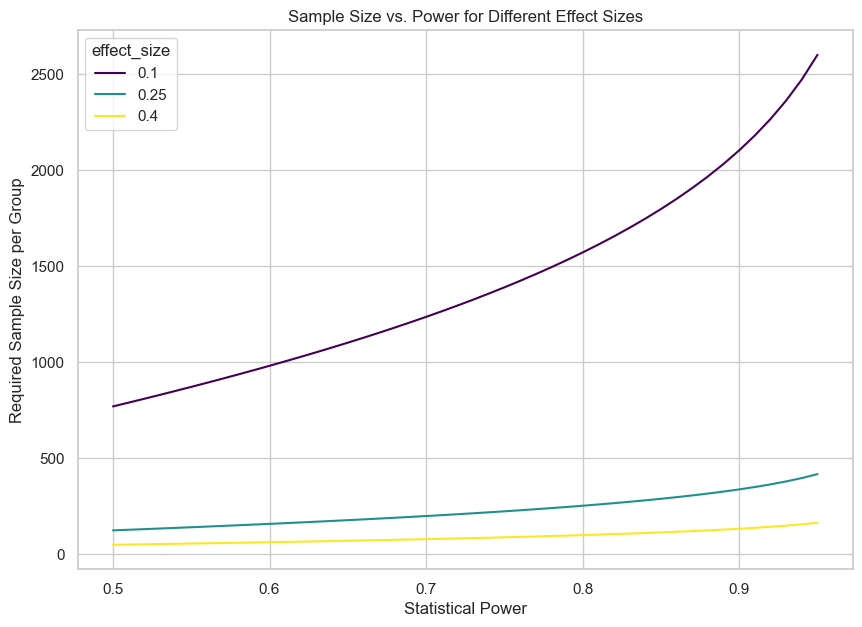

In [ ]:
# --- Question 2 ---
print("\n--- Question 2 ---")
# --- a ---
print("\n## 2a: Power Analysis")
effect_size = 0.2
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1, # For equal sample sizes
    alternative='two-sided'
)
print(f"Required sample size per group (n): {sample_size:.2f}")
print(f"Total required sample size: {2 * sample_size:.2f}")

# --- b ---
print("\n## 2b: Power Curve Plot")
target_power = np.arange(0.5, 0.96, 0.01)
effects = [0.1, 0.25, 0.4]

results = []
for p in target_power:
    for e in effects:
        n = power_analysis.solve_power(effect_size=e, power=p, alpha=0.05, alternative='two-sided')
        results.append({'power': p, 'effect_size': e, 'sample_size': n})

power_df = pd.DataFrame(results)

plt.figure(figsize=(10, 7))
sns.lineplot(
    data=power_df,
    x='power',
    y='sample_size',
    hue='effect_size',
    palette='viridis',
    legend='full'
)
plt.xlabel("Statistical Power")
plt.ylabel("Required Sample Size per Group")
plt.title("Sample Size vs. Power for Different Effect Sizes")
plt.show()

In [ ]:
# --- Question 3 ---
print("\n--- Question 3 ---")
try:
    q3 = pd.read_csv("HW3 Question 3 Data S2025.csv")
    q3.columns = ['Cost_Error', 'Algorithm', 'Project']

    # --- a ---
    print("\n## 3a: One-Way ANOVA")
    q3m1 = ols('Cost_Error ~ C(Algorithm)', data=q3).fit()
    anova_q3a = sm.stats.anova_lm(q3m1, typ=2)
    print(anova_q3a)
    print("\nWith p < 0.05, there's strong evidence that at least one algorithm differs in mean cost error.")

    # --- b ---
    print("\n## 3b: Diagnostic Plots for Model 1")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    # Residuals vs Fitted
    sns.residplot(x=q3m1.fittedvalues, y=q3m1.resid, lowess=True, ax=axes[0, 0], line_kws={'color': 'red', 'lw': 1})
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    # Q-Q Plot
    sm.qqplot(q3m1.resid, line='s', ax=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')
    # Scale-Location
    sqrt_std_resid = np.sqrt(np.abs(q3m1.get_influence().resid_studentized_internal))
    sns.scatterplot(x=q3m1.fittedvalues, y=sqrt_std_resid, ax=axes[1, 0])
    axes[1, 0].set_title('Scale-Location')
    axes[1, 0].set_xlabel('Fitted values')
    axes[1, 0].set_ylabel('Sqrt(Standardized Residuals)')
    # Residuals vs Leverage (Not in original but common)
    sm.graphics.influence_plot(q3m1, ax=axes[1, 1], criterion="cooks")
    fig.tight_layout()
    plt.show()

    # --- c ---
    print("\n## 3c: Group Means for Algorithm")
    algo_effects = q3.groupby('Algorithm')['Cost_Error'].mean() - q3['Cost_Error'].mean()
    print("Algorithm Effects (Group Mean - Grand Mean):")
    print(algo_effects)
    print("\nFunction Points shows the lowest error, so it could be chosen for practical use.")

    # --- d ---
    print("\n## 3d: Two-Way ANOVA with Interaction")
    # Using C() to ensure variables are treated as categorical
    q3m2 = ols('Cost_Error ~ C(Project) * C(Algorithm)', data=q3).fit()
    anova_q3d = sm.stats.anova_lm(q3m2, typ=2)
    print(anova_q3d)
    
    print("\nDiagnostic plots for the two-way ANOVA model:")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.residplot(x=q3m2.fittedvalues, y=q3m2.resid, lowess=True, ax=axes[0, 0], line_kws={'color': 'red', 'lw': 1})
    axes[0, 0].set_title('Residuals vs Fitted')
    sm.qqplot(q3m2.resid, line='s', ax=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')
    sqrt_std_resid2 = np.sqrt(np.abs(q3m2.get_influence().resid_studentized_internal))
    sns.scatterplot(x=q3m2.fittedvalues, y=sqrt_std_resid2, ax=axes[1, 0])
    axes[1, 0].set_title('Scale-Location')
    sm.graphics.influence_plot(q3m2, ax=axes[1, 1], criterion="cooks")
    fig.tight_layout()
    plt.show()
    print("\nIncluding 'Project' as a blocking variable appears to have improved the model's assumptions.")


except FileNotFoundError:
    print("Data file for Question 3 not found.")


--- Question 3 ---


ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [ ]:
# --- Question 4 ---
print("\n--- Question 4 ---")
try:
    q4 = pd.read_csv("HW3 Question 4 Data S2025.csv")
    # Rename columns to be more Python-friendly
    q4.columns = ['Warping', 'Copper_Content', 'Temperature', 'Replication']

    # --- a ---
    print("\n## 4a: Two-Way ANOVA (Categorical Factors)")
    q4m1 = ols('Warping ~ C(Copper_Content) * C(Temperature)', data=q4).fit()
    anova_q4a = sm.stats.anova_lm(q4m1, typ=2)
    print(anova_q4a)
    print("\nCopper content, temperature, and their interaction all have p-values < 0.05, showing they are significant.")

    # --- b ---
    print("\n## 4b: Linear Model (Continuous Factors)")
    # This mimics R's lm() without as.factor()
    q4m2 = ols('Warping ~ Copper_Content * Temperature', data=q4).fit()
    anova_q4b = sm.stats.anova_lm(q4m2, typ=1) # Type 1 to match R's anova() output
    print(anova_q4b)
    print("\nWhen treated as continuous variables, the interaction term is not statistically significant (p > 0.05).")

    # --- c ---
    print("\n## 4c: Diagnostic Plots for Categorical Model")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.residplot(x=q4m1.fittedvalues, y=q4m1.resid, lowess=True, ax=axes[0, 0], line_kws={'color': 'red', 'lw': 1})
    axes[0, 0].set_title('Residuals vs Fitted')
    sm.qqplot(q4m1.resid, line='s', ax=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')
    sqrt_std_resid3 = np.sqrt(np.abs(q4m1.get_influence().resid_studentized_internal))
    sns.scatterplot(x=q4m1.fittedvalues, y=sqrt_std_resid3, ax=axes[1, 0])
    axes[1, 0].set_title('Scale-Location')
    sm.graphics.influence_plot(q4m1, ax=axes[1, 1], criterion="cooks")
    fig.tight_layout()
    plt.show()

    # --- d ---
    print("\n## 4d: Simplified Model (Copper Content Only)")
    q4m3 = ols('Warping ~ C(Copper_Content)', data=q4).fit()
    anova_q4d = sm.stats.anova_lm(q4m3, typ=2)
    print("ANOVA for Copper Content only:")
    print(anova_q4d)

    cc_effects = q4.groupby('Copper_Content')['Warping'].mean() - q4['Warping'].mean()
    print("\nCopper Content Effects (Group Mean - Grand Mean):")
    print(cc_effects)

    print("\nDiagnostic plots for the simplified model:")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.residplot(x=q4m3.fittedvalues, y=q4m3.resid, lowess=True, ax=axes[0, 0], line_kws={'color': 'red', 'lw': 1})
    axes[0, 0].set_title('Residuals vs Fitted')
    sm.qqplot(q4m3.resid, line='s', ax=axes[0, 1])
    axes[0, 1].set_title('Normal Q-Q')
    sqrt_std_resid4 = np.sqrt(np.abs(q4m3.get_influence().resid_studentized_internal))
    sns.scatterplot(x=q4m3.fittedvalues, y=sqrt_std_resid4, ax=axes[1, 0])
    axes[1, 0].set_title('Scale-Location')
    sm.graphics.influence_plot(q4m3, ax=axes[1, 1], criterion="cooks")
    fig.tight_layout()
    plt.show()
    print("\nThe diagnostic plots for this simplified model may show more unexplained variance.")

except FileNotFoundError:
    print("Data file for Question 4 not found.")
